In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Generation: 10 Fitness: 25481
Generation: 20 Fitness: 24285
Generation: 30 Fitness: 22556
Generation: 40 Fitness: 20444
Generation: 50 Fitness: 20105
Generation: 60 Fitness: 19098
Generation: 70 Fitness: 18259
Generation: 80 Fitness: 18217
Generation: 90 Fitness: 18206
Generation: 100 Fitness: 17558
Generation: 110 Fitness: 17475
Generation: 120 Fitness: 16944
Generation: 130 Fitness: 16944
Generation: 140 Fitness: 16746
Generation: 150 Fitness: 16152
Generation: 160 Fitness: 15960
Generation: 170 Fitness: 15960
Generation: 180 Fitness: 15910
Generation: 190 Fitness: 15910
Generation: 200 Fitness: 15910
Generation: 210 Fitness: 15774
Generation: 220 Fitness: 15678
Generation: 230 Fitness: 15678
Generation: 240 Fitness: 15453
Generation: 250 Fitness: 15422
Generation: 260 Fitness: 14851
Generation: 270 Fitness: 14631
Generation: 280 Fitness: 14577
Generation: 290 Fitness: 14145
Generation: 300 Fitness: 14049
Generation: 310 Fitness: 14049
Generation: 320 Fitness: 14049
Generation: 330 F

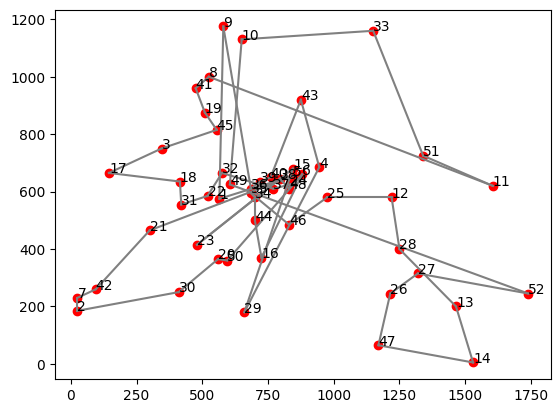

In [12]:
import random
import math
import time
import matplotlib.pyplot as plt

def getCity(file_path):
    cities = []
    with open(file_path) as f:
        for line in f:
            if line.strip() == "NODE_COORD_SECTION":
                break
        for line in f:
            if line.strip() == "EOF":
                break
            node_city_val = line.split()
            cities.append([int(node_city_val[0]), float(node_city_val[1]), float(node_city_val[2])])
    return cities

def euclideanDistance(city1, city2):
    return math.sqrt((city1[1] - city2[1])**2 + (city1[2] - city2[2])**2)

def calcDistance(cities):
    total_sum = 0
    for i in range(len(cities) - 1):
        total_sum += euclideanDistance(cities[i], cities[i + 1])
    total_sum += euclideanDistance(cities[0], cities[-1])
    return total_sum

def orderCrossover(parent1, parent2, point1, point2):
    child = [None] * len(parent1)
    child[point1:point2+1] = parent1[point1:point2+1]
    remaining_values = [value for value in parent2 if value not in child[point1:point2+1]]
    index = 0
    for i in range(len(child)):
        if child[i] is None:
            child[i] = remaining_values[index]
            index += 1
    return child

def cycleCrossover(parent1, parent2):
    child = [None] * len(parent1)
    current_index = 0
    while child[current_index] is None:
        child[current_index] = parent1[current_index]
        current_index = parent2.index(child[current_index])
    for i in range(len(child)):
        if child[i] is None:
            child[i] = parent2[i]
    return child

def inversionMutation(chromosome):
    point1, point2 = random.sample(range(len(chromosome)), 2)
    chromosome[point1:point2+1] = reversed(chromosome[point1:point2+1])
    return chromosome

def swapMutation(chromosome):
    point1, point2 = random.sample(range(len(chromosome)), 2)
    chromosome[point1], chromosome[point2] = chromosome[point2], chromosome[point1]
    return chromosome

def selectPopulation(cities, size):
    population = []
    for i in range(size):
        c = cities.copy()
        random.shuffle(c)
        distance = round(calcDistance(c))
        population.append([distance, c])
    fittest = sorted(population)[0]
    return population, fittest

def geneticAlgorithm(population, lenCities, TOURNAMENT_SELECTION_SIZE, MUTATION_RATE, CROSSOVER_RATE,  max_generations):
    start_time = time.time()
    gen_number = 0
    while gen_number < max_generations and time.time() - start_time < 180:  # Limiter le temps d'exécution à 180 secondes (3 minutes)
        new_population = []
        new_population.append(sorted(population)[0])
        new_population.append(sorted(population)[1])
        for i in range(int((len(population) - 2) / 2)):
            random_number = random.random()
            if random_number < CROSSOVER_RATE:
                parent_chromosome1 = sorted(random.choices(population, k=TOURNAMENT_SELECTION_SIZE))[0]
                parent_chromosome2 = sorted(random.choices(population, k=TOURNAMENT_SELECTION_SIZE))[0]

                # Utilisation du crossover par ordre
                point1, point2 = random.sample(range(lenCities), 2)
                child_chromosome1 = orderCrossover(parent_chromosome1[1], parent_chromosome2[1], point1, point2)

                # Utilisation du crossover par cycle
                child_chromosome2 = cycleCrossover(parent_chromosome1[1], parent_chromosome2[1])
            else:
                child_chromosome1 = random.choices(population)[0][1]
                child_chromosome2 = random.choices(population)[0][1]
            if random.random() < MUTATION_RATE:
                # Utilisation de la mutation par inversion
                child_chromosome1 = inversionMutation(child_chromosome1)

                # Utilisation de la mutation par échange
                child_chromosome2 = swapMutation(child_chromosome2)
            new_population.append([round(calcDistance(child_chromosome1)), child_chromosome1])
            new_population.append([round(calcDistance(child_chromosome2)), child_chromosome2])
        population = new_population
        gen_number += 1
        if gen_number % 10 == 0:
            print("Generation:", gen_number, "Fitness:", sorted(population)[0][0])

    answer = sorted(population)[0]
    elapsed_time = time.time() - start_time
    return answer, gen_number, elapsed_time

def drawMap(cities, answer):
    for j in cities:
        plt.plot(j[1], j[2], "ro")
        plt.annotate(str(j[0]), (j[1], j[2]))
    for i in range(len(answer[1])):
        try:
            first = answer[1][i]
            second = answer[1][i + 1]
            plt.plot([first[1], second[1]], [first[2], second[2]], "gray")
        except:
            continue
    first = answer[1][0]
    second = answer[1][-1]
    plt.plot([first[1], second[1]], [first[2], second[2]], "gray")


    print("Best Fitness:", answer[0])

    plt.show()

def main():
    POPULATION_SIZE = 20
    TOURNAMENT_SELECTION_SIZE = 10
    MUTATION_RATE = 0.2
    CROSSOVER_RATE = 0.9
    MAX_GENERATIONS = 2000  # Modifier ici le nombre maximum de générations

    cities = getCity("/content/drive/MyDrive/Datasets/berlin52.tsp")
    firstPopulation, firstFittest = selectPopulation(cities, POPULATION_SIZE)
    answer, genNumber, elapsed_time = geneticAlgorithm(firstPopulation, len(cities), TOURNAMENT_SELECTION_SIZE, MUTATION_RATE, CROSSOVER_RATE, MAX_GENERATIONS)

    print("\n----------------------------------------------------------------")
    print("Generation:", genNumber)
    print("Fittest chromosome distance before training:", firstFittest[0])
    print("Fittest chromosome distance after training:", answer[0])
    print("Elapsed Time:", elapsed_time, "seconds")
    print("----------------------------------------------------------------")



    drawMap(cities, answer)

if __name__ == "__main__":
    main()